# Mount Drive

Only do this if you're using Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install Necessary Library

In [ ]:
!pip install ultralytics
!pip install tensorflow
!pip install keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.3/896.3 kB 25.5 MB/s eta 0:00:00


# Importing Library

In [ ]:
from ultralytics import YOLO
import os
import pandas as pd
from tensorflow import keras
import zipfile

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Extracting the Dataset in Zip File

In [ ]:
pip install kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download imeldamaretta/flower-disease

Dataset URL: https://www.kaggle.com/datasets/imeldamaretta/flower-disease
License(s): CC0-1.0
 87% 185M/214M [00:01<00:00, 127MB/s]
100% 214M/214M [00:01<00:00, 130MB/s]


In [ ]:
# Specify the path to your zip file
zip_file_path = '/content/flower-disease.zip'  # Replace with your zip file path

# Specify the directory where you want to extract the contents
extract_dir = '/content/drive/MyDrive/dataset/Flower_Disease_v2'  # Replace with your desired extraction directory

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Files extracted to: {extract_dir}")

Files extracted to: /content/drive/MyDrive/dataset/Flower_Disease_v2


# Training the Model

Before training, change the name of test folder to validation folder as YOLOv8 doesn't take test set but using validation set

In [ ]:
from ultralytics import YOLO

# Load YOLOv8 model
model = YOLO('yolov8n.pt')

# Train on custom dataset
model.train(data='/content/drive/MyDrive/dataset/Flower_Disease_v2/data.yaml', epochs=50, imgsz=640, batch=32, lr0 = 0.01)

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/dataset/Flower_Disease_v2/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels

100%|██████████| 755k/755k [00:00<00:00, 23.3MB/s]


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 97.9MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/dataset/Flower_Disease_v2/train/labels... 4010 images, 3 backgrounds, 0 corrupt: 100%|██████████| 4010/4010 [01:27<00:00, 45.84it/s]


train: New cache created: /content/drive/MyDrive/dataset/Flower_Disease_v2/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 515, len(boxes) = 18315. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/dataset/Flower_Disease_v2/valid/labels... 450 images, 0 backgrounds, 0 corrupt: 100%|██████████| 450/450 [00:07<00:00, 56.33it/s]


val: New cache created: /content/drive/MyDrive/dataset/Flower_Disease_v2/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 61, len(boxes) = 1938. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.82G      1.418      2.809      1.629         91        640: 100%|██████████| 126/126 [01:51<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.52s/it]


                   all        450       1938      0.676      0.246       0.24      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.21G      1.305      1.877      1.504         69        640: 100%|██████████| 126/126 [01:46<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]


                   all        450       1938      0.748      0.361      0.387      0.241

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      5.08G      1.283      1.671      1.462         88        640: 100%|██████████| 126/126 [01:45<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.34it/s]


                   all        450       1938       0.43      0.357      0.245      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.79G      1.257      1.578      1.431         84        640: 100%|██████████| 126/126 [01:43<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.33it/s]


                   all        450       1938      0.652      0.322      0.357      0.211

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.52G      1.249      1.471      1.412         72        640: 100%|██████████| 126/126 [01:44<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]


                   all        450       1938      0.527      0.344      0.396      0.272

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       4.7G      1.215      1.393       1.39         76        640: 100%|██████████| 126/126 [01:42<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.12it/s]


                   all        450       1938      0.632      0.499      0.493      0.331

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       5.8G      1.198      1.319      1.378         64        640: 100%|██████████| 126/126 [01:44<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.28it/s]


                   all        450       1938      0.648      0.559      0.537      0.379

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.66G      1.177      1.278      1.361         66        640: 100%|██████████| 126/126 [01:43<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.07s/it]


                   all        450       1938      0.698      0.519      0.562      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.59G      1.168      1.237      1.348         74        640: 100%|██████████| 126/126 [01:38<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.04it/s]


                   all        450       1938      0.529      0.593      0.586       0.39

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.19G       1.15       1.19      1.336         62        640: 100%|██████████| 126/126 [01:42<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.03s/it]


                   all        450       1938      0.734       0.58      0.653      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.53G      1.144      1.169      1.334         56        640: 100%|██████████| 126/126 [01:39<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.04s/it]


                   all        450       1938      0.788      0.514      0.656      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.51G       1.13      1.136      1.323         75        640: 100%|██████████| 126/126 [01:43<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.14s/it]

                   all        450       1938      0.654      0.667      0.627      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.14G      1.122      1.119      1.314         81        640: 100%|██████████| 126/126 [01:38<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.14s/it]


                   all        450       1938      0.673      0.583      0.688      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.91G       1.12      1.088      1.311         64        640: 100%|██████████| 126/126 [01:40<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.19s/it]

                   all        450       1938      0.831      0.531      0.679       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         5G      1.114      1.087      1.301         69        640: 100%|██████████| 126/126 [01:50<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.43it/s]

                   all        450       1938      0.647      0.643      0.637      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.09G      1.096      1.059      1.294         76        640: 100%|██████████| 126/126 [01:42<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.49it/s]

                   all        450       1938      0.844      0.529      0.693      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       5.1G      1.091      1.047      1.296         79        640: 100%|██████████| 126/126 [01:48<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.41it/s]

                   all        450       1938      0.668      0.626      0.671      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.67G      1.086      1.017       1.28         66        640: 100%|██████████| 126/126 [01:43<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.30it/s]


                   all        450       1938      0.732      0.603      0.682      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       5.2G      1.072     0.9942       1.28         54        640: 100%|██████████| 126/126 [01:49<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.22it/s]


                   all        450       1938      0.788      0.648      0.711      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.76G      1.067     0.9874       1.28         88        640: 100%|██████████| 126/126 [01:45<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.32it/s]


                   all        450       1938      0.703      0.708      0.689      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.71G      1.072     0.9773      1.279         71        640: 100%|██████████| 126/126 [01:44<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.35it/s]


                   all        450       1938      0.819      0.599      0.705      0.532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.28G      1.059     0.9553      1.264         68        640: 100%|██████████| 126/126 [01:51<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.06s/it]


                   all        450       1938      0.721      0.664      0.669      0.488

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.76G       1.04     0.9274      1.257         52        640: 100%|██████████| 126/126 [01:39<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.22s/it]

                   all        450       1938      0.749      0.691        0.7      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.96G      1.035     0.9225      1.256         64        640: 100%|██████████| 126/126 [01:45<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.13s/it]

                   all        450       1938      0.828      0.683      0.766      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.84G      1.031     0.9164      1.245         93        640: 100%|██████████| 126/126 [01:39<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.11s/it]


                   all        450       1938       0.76      0.693      0.742      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.97G      1.027     0.9004      1.243         93        640: 100%|██████████| 126/126 [01:43<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.03s/it]

                   all        450       1938      0.708      0.721      0.721      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.25G      1.031      0.896      1.247         89        640: 100%|██████████| 126/126 [01:35<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.20s/it]

                   all        450       1938      0.787      0.678       0.76      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.07G      1.017     0.8782      1.235         72        640: 100%|██████████| 126/126 [01:47<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.17it/s]

                   all        450       1938      0.782      0.696      0.729      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.35G      1.001     0.8728      1.233        129        640: 100%|██████████| 126/126 [01:42<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]

                   all        450       1938      0.841      0.698      0.745      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.95G      1.002     0.8609      1.234         89        640: 100%|██████████| 126/126 [01:48<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.46it/s]

                   all        450       1938      0.762       0.73      0.761      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.44G     0.9973     0.8484      1.227         60        640: 100%|██████████| 126/126 [01:45<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.40it/s]


                   all        450       1938      0.811      0.675      0.785      0.596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.51G     0.9916     0.8361      1.222         77        640: 100%|██████████| 126/126 [01:45<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.38it/s]

                   all        450       1938      0.817      0.688       0.77      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.86G     0.9833     0.8229      1.219         97        640: 100%|██████████| 126/126 [01:46<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.11it/s]

                   all        450       1938      0.778      0.742      0.761      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.76G     0.9789     0.8162      1.215         65        640: 100%|██████████| 126/126 [01:42<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.29it/s]

                   all        450       1938      0.728      0.705       0.73      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.67G     0.9647     0.7962      1.206         78        640: 100%|██████████| 126/126 [01:48<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]

                   all        450       1938      0.809      0.643      0.755      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      5.06G       0.97     0.7934      1.208        120        640: 100%|██████████| 126/126 [01:44<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.33it/s]


                   all        450       1938      0.799      0.738      0.773      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.78G     0.9715     0.7874      1.208         95        640: 100%|██████████| 126/126 [01:48<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.44it/s]


                   all        450       1938      0.811      0.721      0.758       0.58

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.62G     0.9627     0.7858      1.203         57        640: 100%|██████████| 126/126 [01:41<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.42it/s]

                   all        450       1938      0.819      0.718      0.784      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.62G     0.9598     0.7682      1.197         53        640: 100%|██████████| 126/126 [01:49<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.20s/it]

                   all        450       1938      0.833       0.75      0.844      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.05G      0.955     0.7636        1.2        111        640: 100%|██████████| 126/126 [01:39<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.19s/it]

                   all        450       1938      0.798      0.731      0.774      0.584


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      5.42G     0.9295     0.6403      1.185         49        640: 100%|██████████| 126/126 [01:50<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.23it/s]

                   all        450       1938      0.784      0.718      0.763      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.94G     0.9079     0.5992      1.171         22        640: 100%|██████████| 126/126 [01:41<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.03s/it]

                   all        450       1938      0.872      0.703      0.832      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       4.9G     0.8991     0.5908      1.162         36        640: 100%|██████████| 126/126 [01:41<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:10<00:00,  1.37s/it]

                   all        450       1938      0.837      0.727      0.815      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      5.24G     0.8768     0.5727      1.149         45        640: 100%|██████████| 126/126 [01:41<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.34it/s]

                   all        450       1938       0.71      0.842      0.836       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.82G     0.8769     0.5648      1.146         35        640: 100%|██████████| 126/126 [01:50<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.05it/s]


                   all        450       1938      0.855      0.718      0.816      0.633

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.53G     0.8705     0.5524      1.144         51        640: 100%|██████████| 126/126 [01:46<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.05s/it]


                   all        450       1938      0.667      0.827      0.813      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       4.5G     0.8595     0.5459      1.138         26        640: 100%|██████████| 126/126 [01:45<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.21it/s]

                   all        450       1938      0.705       0.83       0.82      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      5.25G      0.855     0.5337      1.132         50        640: 100%|██████████| 126/126 [01:43<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.05it/s]

                   all        450       1938      0.734      0.808      0.836      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.97G     0.8484      0.528      1.124         41        640: 100%|██████████| 126/126 [01:43<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.23it/s]

                   all        450       1938       0.69      0.832      0.849      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      5.07G     0.8412     0.5216      1.124         39        640: 100%|██████████| 126/126 [01:46<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.20it/s]

                   all        450       1938      0.697      0.835      0.859      0.654



50 epochs completed in 1.585 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.3MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:15<00:00,  1.96s/it]


                   all        450       1938      0.697      0.834      0.859      0.655
            black-spot        135        373      0.905       0.96      0.979      0.771
                blight          8          8      0.679      0.875      0.832      0.832
          downy-mildew         79        306      0.816      0.863      0.893       0.64
        fungal-disease        212        625      0.846      0.928      0.947      0.734
               healthy        218        597      0.762        0.9      0.923      0.716
               jasmine          1          4      0.132       0.75       0.75      0.378
                orchid          2          5      0.539        0.4      0.552      0.284
                  rose         16         20      0.894          1      0.995      0.882
Speed: 0.3ms preprocess, 2.7ms inference, 0.1ms loss, 6.2ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b1ce8c30730>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

# Testing the Model


image 1/1 /content/drive/MyDrive/dataset/Flower_Disease_v2/valid/images/Rose-Train-269-_jpeg_jpg.rf.89cb5094b493d70747eacba13d1ab63f.jpg: 640x640 1 rose, 12.6ms
Speed: 2.2ms preprocess, 12.6ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict7
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([7.], device='cuda:0')
conf: tensor([0.9465], device='cuda:0')
data: tensor([[305.0094, 184.8577, 616.7097, 560.5870,   0.9465,   7.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([1, 6])
xywh: tensor([[460.8596, 372.7224, 311.7003, 375.7293]], device='cuda:0')
xywhn: tensor([[0.7201, 0.5824, 0.4870, 0.5871]], device='cuda:0')
xyxy: tensor([[305.0094, 184.8577, 616.7097, 560.5870]], device='cuda:0')
xyxyn: tensor([[0.4766, 0.2888, 0.9636, 0.8759]], device='cuda:0')
tensor([0.9465], device='cuda:0')
tensor([7.], device='cuda:0')


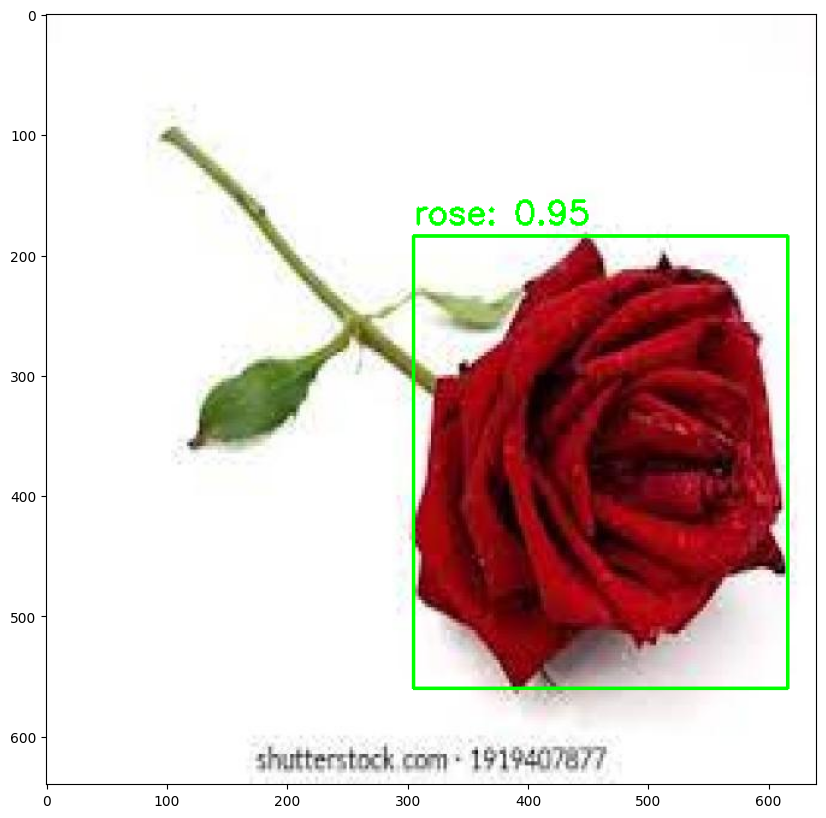

In [ ]:
# Load the trained model. Replace with the actual path to your trained weights.
model_path = '/content/runs/detect/train2/weights/best.pt' # Update with the correct path to your trained weights
model = YOLO(model_path)

# Testing the Model
test_path = '/content/drive/MyDrive/dataset/Flower_Disease_v2/valid/images/Rose-Train-269-_jpeg_jpg.rf.89cb5094b493d70747eacba13d1ab63f.jpg'
results = model.predict(source=test_path, save=True, conf=0.25)

# Print the bounding boxes, confidence scores, and class names.
for r in results:
    print(r.boxes) # Print bounding box information
    print(r.boxes.conf) # Print confidence scores
    print(r.boxes.cls) # Print predicted classes

# Optionally, you can visualize the results
# For example, displaying images with bounding boxes directly in the notebook.

# Display the image with bounding boxes
import matplotlib.pyplot as plt
import cv2

img = cv2.imread(test_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB format

for r in results:
    for box in r.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = box.conf[0]
        cls = int(box.cls[0])
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw bounding boxes
        text = f"{model.names[cls]}: {conf:.2f}"
        cv2.putText(img, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()